In [1]:
#using Distributed
#@everywhere using MambaModels
using MambaModels, MCMCChains

Data

In [2]:
globe_toss = Dict{Symbol, Any}(
  :w => [6, 7, 5, 6, 6],
  :n => [9, 9, 9, 9, 9]
)
globe_toss[:N] = length(globe_toss[:w]);

Model Specification

In [3]:
model = Model(
  w = Stochastic(1,
    (n, p, N) ->
      UnivariateDistribution[Binomial(n[i], p) for i in 1:N],
    false
  ),
  p = Stochastic(() -> Beta(1, 1))
);

Initial Values

In [4]:
inits = [
  Dict(:w => globe_toss[:w], :n => globe_toss[:n], :p => 0.5),
  Dict(:w => globe_toss[:w], :n => globe_toss[:n], :p => rand(Beta(1, 1)))
];

Sampling Scheme

In [5]:
scheme = [NUTS(:p)]
setsamplers!(model, scheme);

MCMC Simulations

In [6]:
chn = mcmc(model, globe_toss, inits, 10000, burnin=2500, thin=1, chains=2);

MCMC Simulation of 10000 Iterations x 2 Chains...

Chain 1:   0% [0:29:51 of 0:29:53 remaining]
Chain 1:  10% [0:00:17 of 0:00:19 remaining]
Chain 1:  20% [0:00:08 of 0:00:10 remaining]
Chain 1:  30% [0:00:05 of 0:00:08 remaining]
Chain 1:  40% [0:00:04 of 0:00:06 remaining]
Chain 1:  50% [0:00:02 of 0:00:05 remaining]
Chain 1:  60% [0:00:02 of 0:00:04 remaining]
Chain 1:  70% [0:00:01 of 0:00:04 remaining]
Chain 1:  80% [0:00:01 of 0:00:03 remaining]
Chain 1:  90% [0:00:00 of 0:00:03 remaining]
Chain 1: 100% [0:00:00 of 0:00:03 remaining]

Chain 2:   0% [0:00:01 of 0:00:01 remaining]
Chain 2:  10% [0:00:01 of 0:00:01 remaining]
Chain 2:  20% [0:00:01 of 0:00:01 remaining]
Chain 2:  30% [0:00:01 of 0:00:01 remaining]
Chain 2:  40% [0:00:00 of 0:00:01 remaining]
Chain 2:  50% [0:00:00 of 0:00:01 remaining]
Chain 2:  60% [0:00:00 of 0:00:01 remaining]
Chain 2:  70% [0:00:00 of 0:00:01 remaining]
Chain 2:  80% [0:00:00 of 0:00:01 remaining]
Chain 2:  90% [0:00:00 of 0:00:01 remaining]
Cha

Describe draws

In [7]:
describe(chn)

Iterations = 2501:10000
Thinning interval = 1
Chains = 1,2
Samples per chain = 7500

Empirical Posterior Estimates:
     Mean        SD       Naive SE        MCSE      ESS
p 0.6599326 0.067700357 0.0005527711 0.00061198462 7500

Quantiles:
     2.5%      25.0%     50.0%     75.0%     97.5%  
p 0.52062385 0.6160976 0.6622956 0.706983 0.78808489



Convert to MCMCChains.Chains object

In [8]:
chn2 = MCMCChains.Chains(chn.value, Symbol.(chn.names))

Object of type Chains, with data of type 7500×1×2 Array{Union{Missing, Float64},3}

Log evidence      = 0.0
Iterations        = 1:7500
Thinning interval = 1
Chains            = Chain1, Chain2
Samples per chain = 7500
parameters        = p

parameters
   Mean    SD   Naive SE  MCSE   ESS
p 0.6599 0.0677   0.0006 0.0006 7500



Describe the MCMCChains

In [9]:
MCMCChains.describe(chn2)

Log evidence      = 0.0
Iterations        = 1:7500
Thinning interval = 1
Chains            = Chain1, Chain2
Samples per chain = 7500
parameters        = p

Empirical Posterior Estimates:
parameters
   Mean    SD   Naive SE  MCSE   ESS
p 0.6599 0.0677   0.0006 0.0006 7500

Quantiles:
parameters
   2.5%   25.0%  50.0% 75.0% 97.5%
p 0.3687 0.6161 0.6623 0.707 0.871



Plot chn2

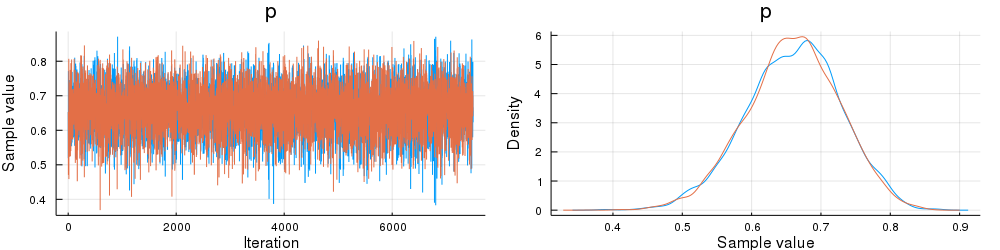

In [10]:
MCMCChains.plot(chn2)

End of `02/m2.1m.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*